# phase 4.1 model evaluation: BoW + Naive Bayes

In [46]:
import pandas as pd
import numpy as np
import pickle
import ast
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
def visualise_metrics(metrics_summary: pd.DataFrame) -> None:
    plt.figure(figsize=(5, 2))  # adjust size as needed
    plt.axis('off')  # turn off axes

    table = plt.table(
        cellText=metrics_summary.values,
        colLabels=metrics_summary.columns,
        cellLoc='center',
        loc='center'
    )

    table.scale(1, 1.5)  # adjust cell size
    plt.title("Evaluation Metrics", pad=10)
    plt.tight_layout()
    plt.show()

## 5-star classification

In [ ]:
def visualise_conf_matrix_5_stars(conf_matrix_df: pd.DataFrame) -> None:
    plt.figure(figsize=(6, 5))
    plt.imshow(conf_matrix_df, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    num_classes = conf_matrix_df.shape[0]
    tick_marks = range(num_classes)

    plt.xticks(tick_marks, range(1, num_classes+1))
    plt.yticks(tick_marks, range(1, num_classes+1))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Add numbers to the boxes
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, format(conf_matrix_df.iloc[i, j], 'd'),
                    ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

In [36]:
def evaluate_model_5_stars(test_texts_path: str, test_labels_path: str, model_path: str) -> tuple:
    # load model
    with open(model_path, 'rb') as file:
        model_package = pickle.load(file)

    vectorizer = model_package['vectorizer']
    model = model_package['model']

    # load test data
    X_test_raw = pd.read_csv(test_texts_path, index_col=0)
    y_test = pd.read_csv(test_labels_path, index_col=0).squeeze()

    # align indexes
    X_test_raw, y_test = X_test_raw.align(y_test, join='inner', axis=0)

    # convert strings to dictrionaries
    X_test_dicts = X_test_raw.iloc[:, 0].apply(ast.literal_eval)

    # convert to matrix
    X_test = vectorizer.transform(X_test_dicts)

    # prediction
    y_pred = model.predict(X_test)

    # calculate and save the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    metrics_summary = pd.DataFrame({
        'metric': ['accuracy', 'precision', 'recall', 'f1_score'],
        'value': [accuracy, precision, recall, f1]
    })

    conf_matrix_df = pd.DataFrame(conf_matrix)

    return metrics_summary, conf_matrix_df


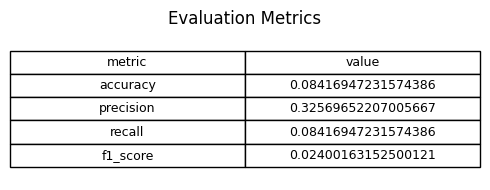

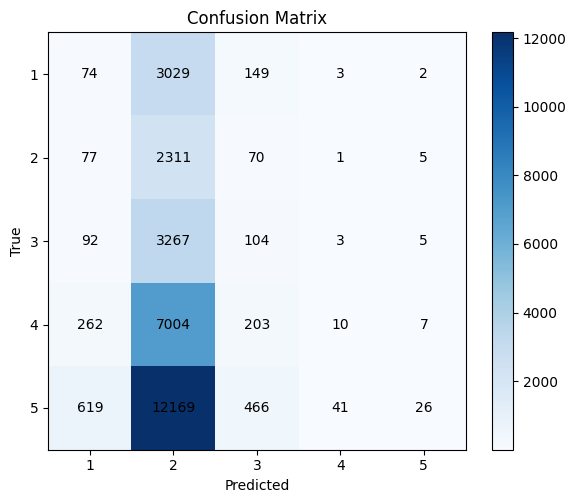

In [ ]:
# 70/30 version

metrics, conf_matrix = evaluate_model_5_stars(
    test_texts_path='../data/70_30/test_texts_bow.csv',
    test_labels_path='../data/70_30/test_labels.csv',
    model_path='../models/BoW_70_30.pkl' 
)

visualise_metrics(metrics)
visualise_conf_matrix_5_stars(conf_matrix)

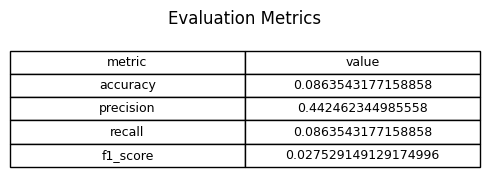

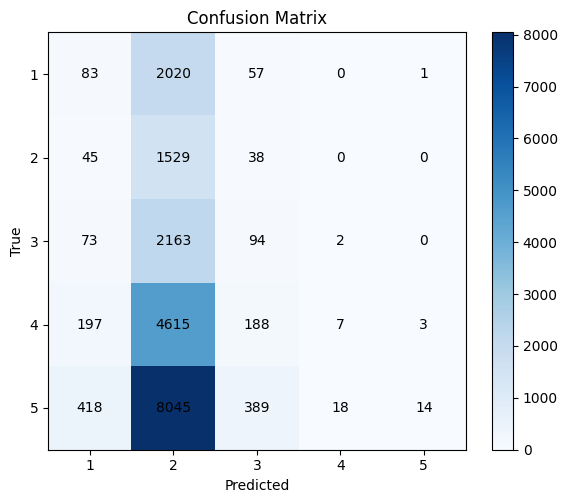

In [ ]:
# 80/20 version

metrics, conf_matrix = evaluate_model_5_stars(
    test_texts_path='../data/80_20/test_texts_bow.csv',
    test_labels_path='../data/80_20/test_labels.csv',
    model_path='../models/BoW_80_20.pkl' 
)

visualise_metrics(metrics)
visualise_conf_matrix_5_stars(conf_matrix)

## positive/neutral/negative classification

In [48]:
def visualise_conf_matrix_pnn(conf_matrix_df: pd.DataFrame) -> None:
    plt.figure(figsize=(6, 5))
    plt.imshow(conf_matrix_df, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    class_labels = ['Positive', 'Neutral', 'Negative']

    num_classes = conf_matrix_df.shape[0]
    tick_marks = np.arange(num_classes)

    # Adjust the tick marks and labels to match the sentiment classes
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Add numbers to the boxes
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, format(conf_matrix_df.iloc[i, j], 'd'),
                    ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

In [54]:
def evaluate_model_pnn(test_texts_path: str, test_labels_path: str, model_path: str) -> tuple:
    # load model
    with open(model_path, 'rb') as file:
        model_package = pickle.load(file)

    vectorizer = model_package['vectorizer']
    model = model_package['model']

    # load test data
    X_test_raw = pd.read_csv(test_texts_path, index_col=0)
    y_test = pd.read_csv(test_labels_path, index_col=0).squeeze()

    # map stars to sentiments
    def map_sentiment(star_rating):
        if star_rating in [4, 5]:
            return 'Positive'
        elif star_rating == 3:
            return 'Neutral'
        else:
            return 'Negative'

    y_test = y_test.map(map_sentiment)

    # align indexes
    X_test_raw, y_test = X_test_raw.align(y_test, join='inner', axis=0)

    # convert strings to dictrionaries
    X_test_dicts = X_test_raw.iloc[:, 0].apply(ast.literal_eval)

    # convert to matrix
    X_test = vectorizer.transform(X_test_dicts)

    # prediction
    y_pred = model.predict(X_test)

    # calculate and save the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    metrics_summary = pd.DataFrame({
        'metric': ['accuracy', 'precision', 'recall', 'f1_score'],
        'value': [accuracy, precision, recall, f1]
    })

    conf_matrix_df = pd.DataFrame(conf_matrix)

    return metrics_summary, conf_matrix_df


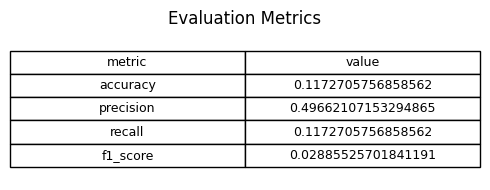

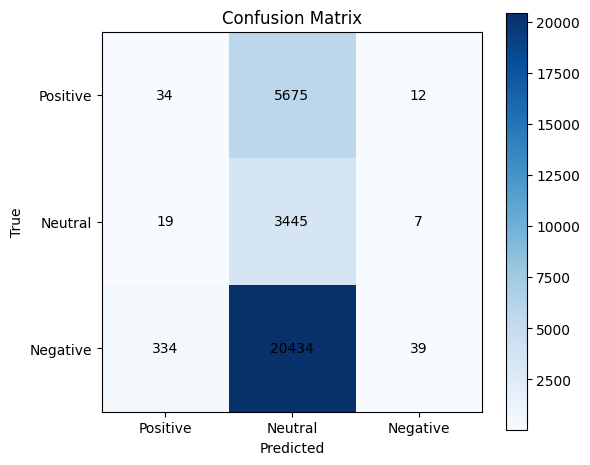

In [55]:
# 70/30 version

metrics, conf_matrix = evaluate_model_pnn(
    test_texts_path='../data/70_30/test_texts_bow.csv',
    test_labels_path='../data/70_30/test_labels.csv',
    model_path='../models/BoW_70_30_PNN.pkl' 
)

visualise_metrics(metrics)
visualise_conf_matrix_pnn(conf_matrix)

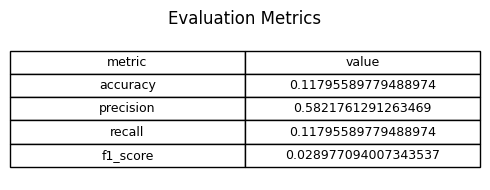

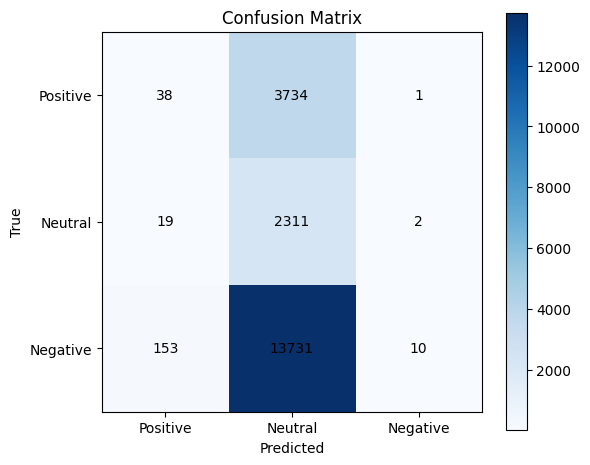

In [56]:
# 80/20 version
metrics, conf_matrix = evaluate_model_pnn(
    test_texts_path='../data/80_20/test_texts_bow.csv',
    test_labels_path='../data/80_20/test_labels.csv',
    model_path='../models/BoW_70_30_PNN.pkl' 
)

visualise_metrics(metrics)
visualise_conf_matrix_pnn(conf_matrix)

## conclusions

Summary of models metrics:

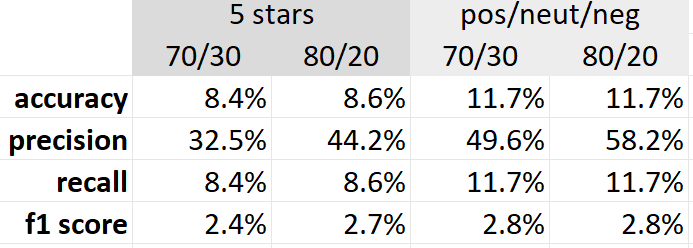

Conclusions:

- classification into positive/neutral/negative achieves better results
- models trained in the proportions 80/20 achieve slightly better results than models trained in the 70/30 proportions
- overall metrics are rather poor

Why might the models be performing so poorly?

- BoW treats words as tokens without context
- Naive Bayes treats features as independent, which is not true for natura language where the surrounding words influence each other
- Native Bayes performs best on binary classification, and not mutliclass clasification (which is visible in how the model improved when reducing the number of classes)
- uneven distribution of classes in the original dataset - much more data representing positive sentiment causes the model to overestimate the negative sentiments